<a href="https://colab.research.google.com/github/marioklau/Machine_Learning/blob/main/UTS_Multiple_LInear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_excel('HARGA RUMAH JAKSEL.xlsx')

In [ ]:
new_column = [col.replace('HARGA', 'harga').replace('KOTA', 'kota') for col in data.columns]
data.columns = new_column

In [ ]:
new_data = ['LT', 'LB', 'JKT', 'JKM', 'GRS', 'harga']
data = data[new_data]
data.head()

,LT,LB,JKT,JKM,GRS,harga
0,1100,700,5,6,ADA,28000000000
1,824,800,4,4,ADA,19000000000
2,500,400,4,3,ADA,4700000000
3,251,300,5,4,ADA,4900000000
4,1340,575,4,5,ADA,28000000000


In [ ]:
def transform_grs (grs):
  if grs == 'ADA':
    return 1
  if grs == 'TIDAK ADA' :
    return 0
data['GRS'] = data['GRS'].apply(transform_grs)

In [ ]:
data.head()

,LT,LB,JKT,JKM,GRS,harga
0,1100,700,5,6,1,28000000000
1,824,800,4,4,1,19000000000
2,500,400,4,3,1,4700000000
3,251,300,5,4,1,4900000000
4,1340,575,4,5,1,28000000000


In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data, columns = ['harga', 'LT', 'LB', 'JKT', 'JKM', 'GRS'])

In [ ]:
data.head()

,harga,LT,LB,JKT,JKM,GRS
0,0.159279,0.066453,0.153846,0.192308,1.0,0.110470
1,0.118499,0.076491,0.115385,0.115385,1.0,0.074408
2,0.070626,0.036338,0.115385,0.076923,1.0,0.017109
3,0.033836,0.026300,0.153846,0.115385,1.0,0.017911
4,0.194740,0.053905,0.115385,0.153846,1.0,0.110470


## Multiple Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
x = data[['LT', 'LB', 'JKT', 'JKM', 'GRS']]
y = data[['harga']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.5858748991896539


In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_pred = mean_squared_error(y_test, y_test_pred)

print(mse_train)
print(mse_pred)

0.0022864248675505245
0.0027048511639318324


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_pred)

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 0.04781657523861913
RMSE Test: 0.052008183624616545


In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

          harga        LT        LB       JKT       JKM       GRS
harga  1.000000  0.680570  0.213542  0.221130  0.061946  0.740467
LT     0.680570  1.000000  0.207762  0.230514  0.088092  0.651660
LB     0.213542  0.207762  1.000000  0.851954  0.036695  0.217737
JKT    0.221130  0.230514  0.851954  1.000000  0.074193  0.231875
JKM    0.061946  0.088092  0.036695  0.074193  1.000000  0.096788
GRS    0.740467  0.651660  0.217737  0.231875  0.096788  1.000000


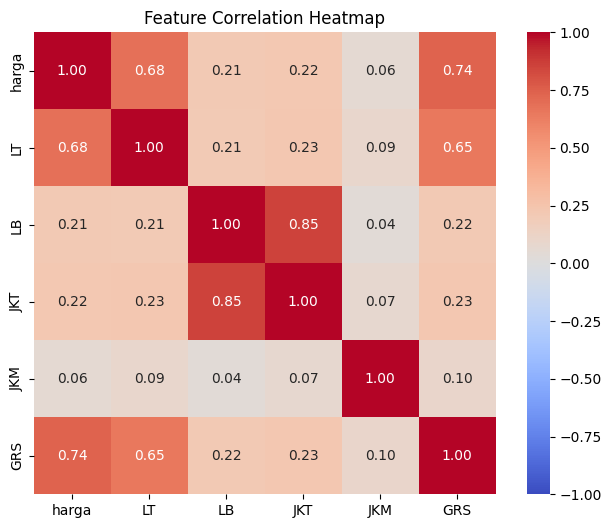

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()